In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('C:/Users/MAVERICK/OneDrive/Desktop/Deep Learning/DATASET/Indian Amazon Product Review/amazon_vfl_reviews.csv')
df.head()

,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [3]:
df.drop(['asin','name','date'],axis=1,inplace=True)
df.head()

,rating,review
0,1,I bought this hair oil after viewing so many g...
1,5,Used This Mama Earth Newly Launched Onion Oil ...
2,1,So bad product...My hair falling increase too ...
3,1,Product just smells similar to navarathna hair...
4,5,I have been trying different onion oil for my ...


In [4]:
df.rating.value_counts().sum()

2782

In [5]:
df.review

0       I bought this hair oil after viewing so many g...
1       Used This Mama Earth Newly Launched Onion Oil ...
2       So bad product...My hair falling increase too ...
3       Product just smells similar to navarathna hair...
4       I have been trying different onion oil for my ...
                              ...                        
2777           Long lasting freshness throughout the day.
2778                                    My preferred soap
2779                                         ठीक नहीं लगा
2780                                        Super Product
2781    Best soothing, cooling fragrance for hot summe...
Name: review, Length: 2782, dtype: object

In [6]:
df.isna().sum()

rating    0
review    4
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

rating    0
review    0
dtype: int64

In [9]:
df.shape

(2778, 2)

In [10]:
df.review[0]

"I bought this hair oil after viewing so many good comments. But this product is not good enough.First of all it's Expensive...Second thing the amount of the product is low (half bottle) YES!The bottle is not completely filled with oil. If you cheating on your customers #Mamaearth trust me on this you can't fool people more than once. Now I know that your Brand is not good enough. I am not going to buy any product from your Brand again.Thumbs down for mamaearth onion oil !!"

In [11]:
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [9]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MAVERICK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
import re

In [14]:
stopword = nltk.corpus.stopwords.words('english')

In [15]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation])
    text_rc = re.sub('[0-9]+','',text_lc)
    tokens = word_tokenize(text_rc,language='english')
    text = [wn.lemmatize(word) for word in tokens if word not in stopword]
    return text
    

In [16]:
print(clean_text(df.review[2779]))

['ठीक', 'नहीं', 'लगा']


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics

In [18]:
df['cleaned_review'] = df['review'].apply(lambda x: clean_text(x))

In [19]:
df.head()

,rating,review,cleaned_review
0,1,I bought this hair oil after viewing so many g...,"[bought, hair, oil, viewing, many, good, comme..."
1,5,Used This Mama Earth Newly Launched Onion Oil ...,"[used, mama, earth, newly, launched, onion, oi..."
2,1,So bad product...My hair falling increase too ...,"[bad, productmy, hair, falling, increase, much..."
3,1,Product just smells similar to navarathna hair...,"[product, smell, similar, navarathna, hair, oi..."
4,5,I have been trying different onion oil for my ...,"[trying, different, onion, oil, hair, hair, he..."


In [20]:
X = df['review']
y = df.rating.values

In [21]:
cvt = CountVectorizer(analyzer=clean_text)
X_v = cvt.fit_transform(X)

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier()

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_v,y,test_size=0.33,stratify=y)

In [25]:
y_train

array([1, 5, 5, ..., 1, 5, 5], dtype=int64)

In [26]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred = rf.predict(X_test)

In [28]:
cm = sklearn.metrics.confusion_matrix(y_test,y_pred)

In [29]:
import seaborn as sns

In [30]:
print(sklearn.metrics.accuracy_score(y_test,y_pred))

0.8854961832061069


In [31]:
df_test  = cm
df_test = pd.DataFrame(df_test)

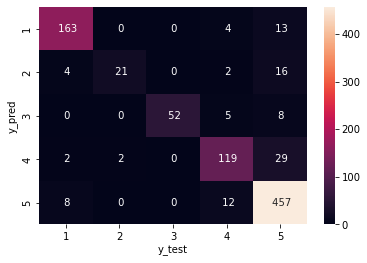

In [32]:
ax = sns.heatmap(df_test,fmt= ' ',annot=True)
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')
ax.set_xticklabels(list(set(y_test)))
ax.set_yticklabels(list(set(y_test)));

